In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive/ITAú/TCC


In [0]:
from core.utils import *
from core.unet import *
from core.multiclass_unet import *

Using TensorFlow backend.


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random
from keras.optimizers import Adam
from tqdm import tqdm

%matplotlib inline

## Split Image into Chunks and save new dataset for training

- Filter images that doesn't have any edification mapped (to prevent human classification error to duty the dataset)
- Split images (8000x8000) into 224x224 chunks

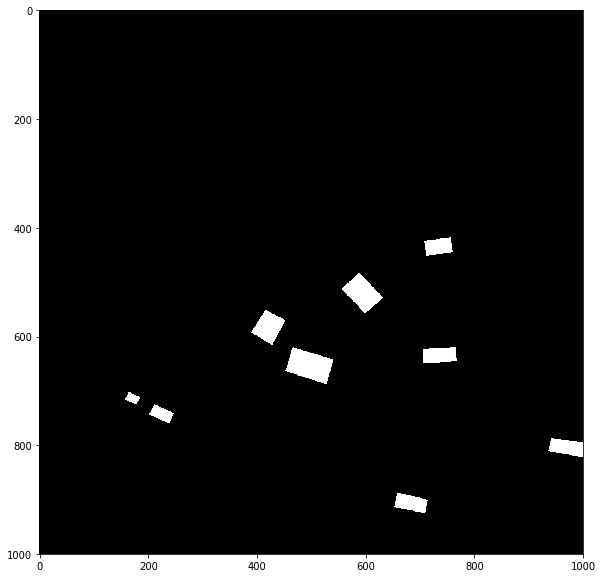

In [0]:
img = cv2.imread("./masks/Chapada/edificacoes/007.jpg")[:1000,6500:7500]
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

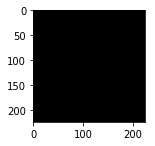

In [0]:
chunks = divide_into_chunks(img, 224)

plt.figure(figsize=(2,10))
plt.imshow(cv2.cvtColor(chunks[2], cv2.COLOR_BGR2RGB));

In [0]:
chunks[2].sum()

0

### Choosing images to be mapped

As each image generates 1296 other images, only 50 images will be used to generate the dataset, because of the computer power needed.

In [0]:
from tqdm import tqdm

In [0]:
id_images = ['070','001','007','018','026',
             '039','076','160','190','213', 
             '223', '360', '365', '400', '420', 
             '455', '495', '513', '519', '550',
             '590','594','367','321','313',
             '277','278','276','275','269',
             '002','106','107','111','129',
             '057','008','005','215','279',
             '280','297','309','315','311',
             '316','318','381','405','406']


In [0]:
import random

In [0]:
# mask_root = './masks/Chapada/edificacoes'
# img_root = './Ortofotos ResoluÃ§Ã£o 25cm'

# for id in id_images:
#   print(f'Image {id}:')

#   # Save chunks of image and mask
#   img = cv2.imread(img_root+'/'+id+'.jpg')
#   mask = cv2.imread(mask_root+'/'+id+'.jpg', 0)
  
#   chunks = divide_into_chunks(img, 224)
#   chunks_masks = divide_into_chunks(mask, 224)
#   for i, (chunk_img, chunk_mask) in tqdm(enumerate(zip(chunks, chunks_masks))):
#     # filter mask that have at least 1 pixel marked as class
#     if chunk_mask.sum() > 0:
#       cv2.imwrite(f'./dataset/Chapada/images/{id}_{str(i).zfill(5)}.jpg', chunk_img)
#       cv2.imwrite(f'./dataset/Chapada/masks-edificacoes/{id}_{str(i).zfill(5)}.jpg', chunk_mask)
#     elif random.random() < 0.3:
#       cv2.imwrite(f'./dataset/Chapada/images/{id}_{str(i).zfill(5)}.jpg', chunk_img)
#       cv2.imwrite(f'./dataset/Chapada/masks-edificacoes/{id}_{str(i).zfill(5)}.jpg', chunk_mask)

Image 070:


1296it [00:07, 174.61it/s]


Image 001:


1296it [00:05, 242.63it/s]


Image 007:


1296it [00:04, 268.11it/s]


Image 018:


1296it [00:05, 244.90it/s]


Image 026:


1296it [00:05, 224.96it/s]


Image 039:


1296it [00:05, 244.35it/s]


Image 076:


1296it [00:05, 255.47it/s]


Image 160:


1296it [00:06, 204.45it/s]


Image 190:


1296it [00:06, 195.08it/s]


Image 213:


1296it [00:06, 214.08it/s]


Image 223:


1296it [00:05, 236.26it/s]


Image 360:


1296it [00:06, 201.46it/s]


Image 365:


1296it [00:06, 203.95it/s]


Image 400:


1296it [00:06, 200.27it/s]


Image 420:


1296it [00:06, 223.28it/s]


Image 455:


1296it [00:06, 213.75it/s]


Image 495:


1296it [00:06, 198.95it/s]


Image 513:


1296it [00:06, 187.04it/s]


Image 519:


1296it [00:06, 204.42it/s]


Image 550:


1296it [00:06, 189.37it/s]


Image 590:


1296it [00:08, 149.35it/s]


Image 594:


1296it [00:07, 184.29it/s]


Image 367:


1296it [00:07, 170.67it/s]


Image 321:


1296it [00:07, 182.18it/s]


Image 313:


1296it [00:06, 191.53it/s]


Image 277:


1296it [00:07, 175.31it/s]


Image 278:


1296it [00:07, 171.93it/s]


Image 276:


1296it [00:06, 187.03it/s]


Image 275:


1296it [00:07, 175.20it/s]


Image 269:


1296it [00:07, 179.88it/s]


Image 002:


1296it [00:07, 175.48it/s]


Image 106:


1296it [00:08, 159.76it/s]


Image 107:


1296it [00:07, 183.93it/s]


Image 111:


1296it [00:07, 179.13it/s]


Image 129:


1296it [00:07, 165.71it/s]


Image 057:


1296it [00:07, 165.59it/s]


Image 007:


1296it [00:07, 176.58it/s]


Image 005:


1296it [00:07, 175.15it/s]


Image 215:


1296it [00:08, 153.31it/s]


Image 279:


1296it [00:08, 159.47it/s]


Image 280:


1296it [00:08, 149.87it/s]


Image 297:


1296it [00:09, 130.60it/s]


Image 309:


1296it [00:08, 154.22it/s]


Image 315:


1296it [00:08, 154.01it/s]


Image 311:


1296it [00:08, 150.10it/s]


Image 316:


1296it [00:08, 148.81it/s]


Image 318:


1296it [00:08, 150.28it/s]


Image 381:


1296it [00:09, 136.16it/s]


Image 405:


1296it [00:09, 142.31it/s]


Image 406:


1296it [00:09, 137.50it/s]


## Training


### Splitting Data

Creating training(80%)/validation(10%)/test(10%) sets

In [0]:
img_root = './dataset/Chapada/images/'
mask_root = './dataset/Chapada/masks-edificacoes/'

images = []
masks = []

for root, dirs, files in os.walk('./dataset/Chapada/masks-edificacoes'):
  for file in files:
      if file.endswith('.jpg'):
          images.append(img_root+file)
          masks.append(mask_root+file)
          
images = np.array(images)
masks = np.array(masks)

In [0]:
images.shape

(21382,)

In [0]:
sample_size = images.shape[0]
randomize = np.random.RandomState(seed=812).permutation(sample_size)
images = images[randomize]
masks = masks[randomize]

In [0]:
training_size = np.floor(.7 * sample_size).astype(int)
val_size = np.floor(.1 * sample_size).astype(int)

X_train = images[:training_size]
y_train = masks[:training_size]
X_val = images[training_size:training_size+val_size]
y_val = masks[training_size:training_size+val_size]
X_test = images[training_size+val_size:]
y_test = masks[training_size+val_size:]

### Loading Generator

TCC_Generator class has been developed to manage the input images through the model during training. It's responsible to split the training set into a series of batches and don't load all images in memory, just the batches.

In [0]:
from core.data_generator import TCCGenerator

In [0]:
batch_size = 32
training_batch_generator = TCCGenerator(X_train, y_train, batch_size)
val_batch_generator = TCCGenerator(X_val, y_val, batch_size)

### Load Model & training

Using the weights of pre-training dataset, compile the model using Adam optimizer with initial learning rate of 0.01 and using learning rate decay of 0.1 and earlyStopping (patience of 15 epochs)

In [0]:
model = UNET_binary_model()
model.load_weights('edifications_model_v1_2.h5')









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "U-NET"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.001), loss=dice_coef_loss, metrics=[dice_coef])

earlyStopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
mcp_save = ModelCheckpoint('./edifications_model_v1_3.h5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1, min_delta=1e-4, mode='min')

num_epochs = 300
queue_size = 12

W0826 19:56:38.808526 140644654954368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
hist = model.fit_generator(generator=training_batch_generator,
                           epochs=num_epochs,
                           verbose=1,
                           validation_data=val_batch_generator,
                           max_queue_size=queue_size,
                           workers=-1,
                           callbacks=[earlyStopping, reduce_lr_loss, mcp_save])

Epoch 1/300
468/468 [==============================] - 6887s 15s/step - loss: 0.1664 - dice_coef: 0.8336 - val_loss: 0.3173 - val_dice_coef: 0.6827
Epoch 2/300
468/468 [==============================] - 961s 2s/step - loss: 0.1648 - dice_coef: 0.8352 - val_loss: 0.2908 - val_dice_coef: 0.7092
Epoch 3/300
468/468 [==============================] - 958s 2s/step - loss: 0.1635 - dice_coef: 0.8365 - val_loss: 0.3019 - val_dice_coef: 0.6981
Epoch 4/300
468/468 [==============================] - 942s 2s/step - loss: 0.1612 - dice_coef: 0.8388 - val_loss: 0.3043 - val_dice_coef: 0.6957
Epoch 5/300
468/468 [==============================] - 938s 2s/step - loss: 0.1600 - dice_coef: 0.8400 - val_loss: 0.3004 - val_dice_coef: 0.6996
Epoch 6/300
468/468 [==============================] - 938s 2s/step - loss: 0.1593 - dice_coef: 0.8407 - val_loss: 0.2997 - val_dice_coef: 0.7003
Epoch 7/300
468/468 [==============================] - 936s 2s/step - loss: 0.1574 - dice_coef: 0.8426 - val_loss: 0.2968 

## Test

In [0]:
X_test = np.load('split files/X_test_edificacoes.npy')
y_test = np.load('split files/y_test_edificacoes.npy')
X_train = np.load('split files/X_train_edificacoes.npy')
y_train = np.load('split files/y_train_edificacoes.npy')
X_val = np.load('split files/X_val_edificacoes.npy')
y_val = np.load('split files/y_val_edificacoes.npy')

### Metrics

2436
1.0


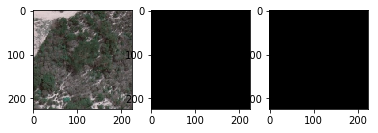

In [0]:
INPUT_SIZE = 224
image_idx = random.randint(0, len(X_test)-1)
#2611, 991, 565, 

img = cv2.imread(X_test[image_idx])
mask = cv2.imread(y_test[image_idx], 0)

pred = model.predict(preprocess_input(img.reshape(1,INPUT_SIZE, INPUT_SIZE, 3)))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img)
axarr[1].imshow(mask, cmap='gray')
axarr[2].imshow(pred[0].reshape(224, 224), cmap='gray')

print(image_idx)
print(dice_coef_float(preprocess_input(mask), np.round(pred[0]).astype(np.uint8).reshape(224, 224)))

In [0]:
X_test.shape

(4277,)

In [0]:
unet_model = MulticlassUNET(classes = ['edificacoes'], input_size = 224)
unet_model.load_UNET_model('edificacoes', 
                                'edifications_model_v1_3.h5')









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
avg_dice_coef, avg_recall, avg_precision, percentual_of_class = unet_model.test_UNET_model('edificacoes', X_train, y_train)


0it [00:00, ?it/s]
1it [00:04,  4.32s/it]
2it [00:04,  3.16s/it]
3it [00:05,  2.31s/it]
4it [00:05,  1.74s/it]
5it [00:05,  1.35s/it]
6it [00:06,  1.08s/it]
7it [00:06,  1.12it/s]
8it [00:07,  1.33it/s]
9it [00:07,  1.61it/s]
10it [00:07,  1.85it/s]
11it [00:08,  1.99it/s]
12it [00:08,  2.23it/s]
13it [00:09,  2.34it/s]
14it [00:09,  2.53it/s]
15it [00:09,  2.63it/s]
16it [00:10,  2.59it/s]
17it [00:10,  2.74it/s]
18it [00:10,  2.46it/s]
19it [00:11,  2.51it/s]
20it [00:11,  2.57it/s]
21it [00:12,  2.62it/s]
22it [00:12,  2.60it/s]
23it [00:12,  2.57it/s]
24it [00:13,  2.72it/s]
25it [00:13,  2.62it/s]
26it [00:13,  2.58it/s]
27it [00:14,  2.66it/s]
28it [00:14,  2.77it/s]
29it [00:14,  2.91it/s]
30it [00:15,  2.84it/s]
31it [00:15,  2.66it/s]
32it [00:16,  2.65it/s]
33it [00:16,  2.69it/s]
34it [00:17,  2.35it/s]
35it [00:17,  2.44it/s]
36it [00:17,  2.45it/s]
37it [00:18,  2.65it/s]
38it [00:18,  2.50it/s]
39it [00:18,  2.50it/s]
40it [00:21,  1.10s/it]
41it [00:22,  1.15it/s]
42it 

In [0]:
print(f'#### Training Results ####\
      \n% of pixels representing the class: {percentual_of_class}%\
      \nAverage Dice Coefficient: {avg_dice_coef}\
      \nAverage Precision Score: {avg_precision}\
      \nAverage Recall Score: {avg_recall}')

#### Training Results ####      
% of pixels representing the class: 0.010522881951688294%      
Average Dice Coefficient: 0.9526567473317394      
Average Precision Score: 0.8661809127209698      
Average Recall Score: 0.6323747830884289


In [0]:
avg_dice_coef, avg_recall, avg_precision, percentual_of_class = unet_model.test_UNET_model('edificacoes', X_val, y_val)


0it [00:00, ?it/s]
1it [00:00,  3.46it/s]
2it [00:00,  2.64it/s]
3it [00:01,  2.76it/s]
4it [00:01,  2.87it/s]
5it [00:01,  2.88it/s]
6it [00:02,  2.65it/s]
7it [00:02,  2.76it/s]
8it [00:03,  2.61it/s]
9it [00:03,  2.67it/s]
10it [00:03,  2.55it/s]
11it [00:04,  2.52it/s]
12it [00:04,  2.44it/s]
13it [00:05,  2.52it/s]
14it [00:05,  2.58it/s]
15it [00:05,  2.65it/s]
16it [00:06,  2.65it/s]
17it [00:06,  2.74it/s]
18it [00:06,  2.54it/s]
19it [00:07,  2.68it/s]
20it [00:07,  2.65it/s]
21it [00:08,  2.60it/s]
22it [00:08,  2.60it/s]
23it [00:08,  2.74it/s]
24it [00:09,  2.85it/s]
25it [00:09,  2.93it/s]
26it [00:09,  2.84it/s]
27it [00:10,  2.93it/s]
28it [00:10,  2.92it/s]
29it [00:10,  3.00it/s]
30it [00:11,  2.86it/s]
31it [00:11,  2.86it/s]
32it [00:11,  2.94it/s]
33it [00:12,  2.85it/s]
34it [00:12,  2.83it/s]
35it [00:12,  2.74it/s]
36it [00:13,  2.82it/s]
37it [00:13,  2.89it/s]
38it [00:14,  2.66it/s]
39it [00:14,  2.66it/s]
40it [00:14,  2.39it/s]
41it [00:15,  2.58it/s]
42it 

In [0]:
print(f'#### Validation Results ####\
      \n% of pixels representing the class: {percentual_of_class}%\
      \nAverage Dice Coefficient: {avg_dice_coef}\
      \nAverage Precision Score: {avg_precision}\
      \nAverage Recall Score: {avg_recall}')

#### Validation Results ####      
% of pixels representing the class: 0.01015730521921117%      
Average Dice Coefficient: 0.9342015743051886      
Average Precision Score: 0.790325116779942      
Average Recall Score: 0.5293454484138089


In [0]:
avg_dice_coef, avg_recall, avg_precision, percentual_of_class = unet_model.test_UNET_model('edificacoes', X_test, y_test)


0it [00:00, ?it/s]
1it [00:04,  4.90s/it]
2it [00:05,  3.69s/it]
3it [00:06,  2.81s/it]
4it [00:07,  2.25s/it]
5it [00:08,  1.86s/it]
6it [00:09,  1.62s/it]
7it [00:10,  1.35s/it]
8it [00:10,  1.16s/it]
9it [00:11,  1.01s/it]
10it [00:12,  1.03it/s]
11it [00:13,  1.04it/s]
12it [00:14,  1.09it/s]
13it [00:15,  1.08it/s]
14it [00:16,  1.08it/s]
15it [00:16,  1.15it/s]
16it [00:17,  1.17it/s]
17it [00:18,  1.18it/s]
18it [00:19,  1.23it/s]
19it [00:19,  1.26it/s]
20it [00:20,  1.20it/s]
21it [00:21,  1.19it/s]
22it [00:22,  1.19it/s]
23it [00:23,  1.31it/s]
24it [00:23,  1.38it/s]
25it [00:24,  1.31it/s]
26it [00:25,  1.35it/s]
27it [00:26,  1.18it/s]
28it [00:27,  1.20it/s]
29it [00:28,  1.14it/s]
30it [00:28,  1.19it/s]
31it [00:29,  1.18it/s]
32it [00:31,  1.15s/it]
33it [00:33,  1.30s/it]
34it [00:34,  1.18s/it]
35it [00:35,  1.15s/it]
36it [00:36,  1.02s/it]
37it [00:36,  1.09it/s]
38it [00:37,  1.07it/s]
39it [00:38,  1.07it/s]
40it [00:39,  1.03it/s]
41it [00:40,  1.03it/s]
42it 

In [0]:
print(f'#### Test Results ####\
      \n% of pixels representing the class: {percentual_of_class}%\
      \nAverage Dice Coefficient: {avg_dice_coef}\
      \nAverage Precision Score: {avg_precision}\
      \nAverage Recall Score: {avg_recall}')

#### Test Results ####      
% of pixels representing the class: 0.01068274744212042%      
Average Dice Coefficient: 0.937114127743057      
Average Precision Score: 0.8073217858803073      
Average Recall Score: 0.564481548791695


### Predicting edifications

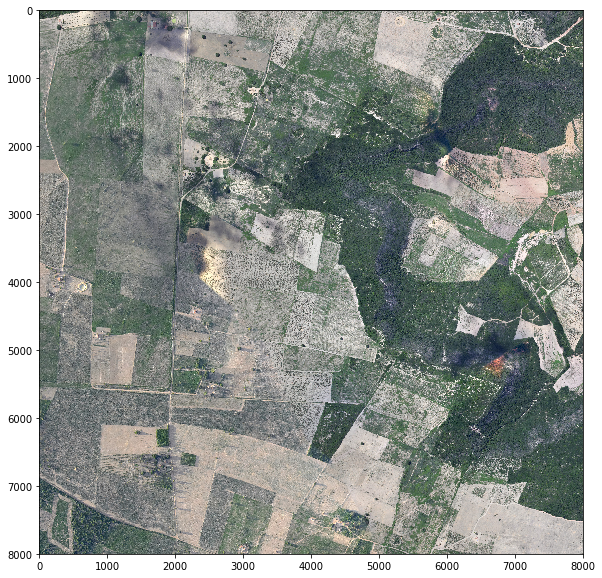

In [0]:
img = cv2.imread("./001.jpg")

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [0]:
chunks = divide_into_chunks(img, 224)

In [0]:
threshold = 0.1
function_to_classify = lambda x: 1 if x > threshold else 0
function_to_classify = np.vectorize(function_to_classify)

In [0]:
INPUT_SIZE = 224
for i in tqdm(range(len(chunks))):
  chunks[i] = function_to_classify(model.predict(preprocess_input(chunks[i].reshape(1,INPUT_SIZE, INPUT_SIZE, 3))))

100%|██████████| 1296/1296 [00:27<00:00, 46.80it/s]


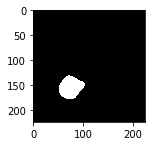

In [0]:
plt.figure(figsize=(2,10))
plt.imshow(chunks[1].reshape(224, 224), cmap = 'gray');

In [0]:
size_image = int(np.sqrt(len(chunks))*INPUT_SIZE)
mask_pred = np.zeros((size_image, size_image))

In [0]:
chunk_idx = 0
for i in range(0, mask_pred.shape[0], INPUT_SIZE):
  for j in range(0, mask_pred.shape[1], INPUT_SIZE):
    mask_pred[i:i+INPUT_SIZE, j:j+INPUT_SIZE] = chunks[chunk_idx].reshape(INPUT_SIZE, INPUT_SIZE)
    chunk_idx += 1

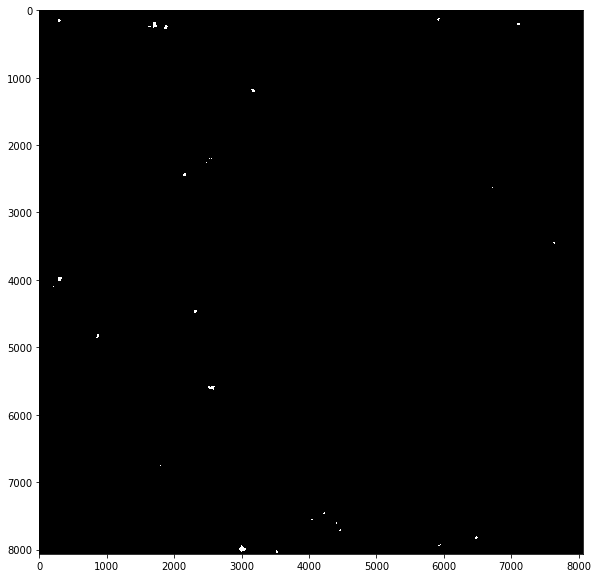

In [0]:
plt.figure(figsize=(20,10))
plt.imshow(mask_pred, cmap = 'gray');

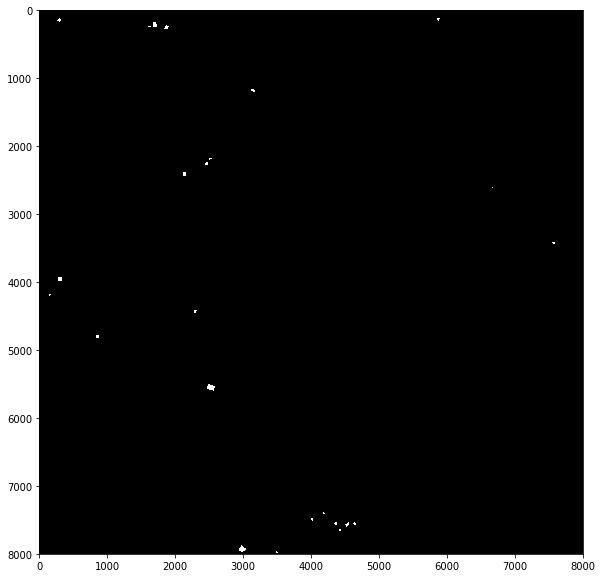

In [0]:
mask = cv2.imread("./masks/001.jpg", 0)

plt.figure(figsize=(20,10))
plt.imshow(mask, cmap = 'gray');